In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels as sm
from factor_analyzer import FactorAnalyzer

In [6]:
raw_data = pd.read_csv('DDQ.csv')
cleaned_data = raw_data.drop(columns=['Timestamp', 'free_response_1', 'free_response_2'])
cleaned_data

,Source,sex_gender?,descriptions_past,descriptions_present,GIQ_1,GIQ_2,GIQ_3,GIQ_4,GIQ_5,GIQ_6,...,CAQ_3,CAQ_4,CAQ_5,CAQ_6,CAQ_7,EAQ_1,EAQ_2,EAQ_3,EAQ_4,EAQ_5
0,Discord Server,Trans Female (Male-to-Female),"Disgusting, Uncanny, Visually Hideous, Self-Co...","Disgusting, Uncanny, Visually Hideous, Self-Co...",5,4,5,5,5,5,...,2,2,1,NaN,NaN,2,1,3,3,2
1,Discord Server,Trans Female (Male-to-Female),"Disgusting, Uncanny, Self-Conscious","Validating, Perfectly Fine/Neutral, Erotic, Ex...",5,4,1,5,5,5,...,1,3,4,2.0,1.0,5,1,2,1,1
2,@VexieVortex (Twitter/X),Trans Female (Male-to-Female),"Disgusting, Uncanny, Visually Hideous, Self-Co...","Validating, Uncanny, Self-Conscious, Erotic, P...",4,5,5,5,5,5,...,2,2,1,1.0,1.0,4,2,1,2,1
3,Discord Server,Trans Female (Male-to-Female),Self-Conscious,Uncanny,5,5,4,5,5,2,...,1,1,1,1.0,1.0,1,1,4,2,4
4,Discord Server,Trans Female (Male-to-Female),"Uncanny, Visually Hideous, Self-Conscious","Validating, Romantic, Perfectly Fine/Neutral, ...",3,5,2,2,4,4,...,1,1,3,2.0,2.0,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,#Transmasc (Tumblr),Trans Male (Female-to-Male),Cogntive Dissonance,Exciting,3,2,5,4,1,2,...,2,3,1,NaN,NaN,1,1,4,1,1
58,#Transfem (Tumblr),Trans Female (Male-to-Female),"Perfectly Fine/Neutral, Cogntive Dissonance","I'm still pre-transition, Disgusting, Visually...",2,2,5,5,3,2,...,1,1,2,1.0,1.0,1,1,3,1,1
59,r/AskAGP (Reddit),Trans Female (Male-to-Female),"Disgusting, Uncanny, Self-Conscious, Cogntive ...","Validating, Uncanny, Exciting, Proud",5,4,5,3,3,5,...,5,2,5,3.0,4.0,4,1,4,2,3
60,#Trans (Tumblr),Trans Male (Female-to-Male),"Uncanny, Self-Conscious","I'm still pre-transition, Validating, Exciting",5,4,3,2,2,4,...,2,3,5,5.0,5.0,2,1,2,3,1


In [37]:
GIQ_labels = []
for i in range(1, 25):
    GIQ_labels.append(f'GIQ_{i}')

fa_data = raw_data[GIQ_labels]

In [38]:
factor_model = FactorAnalyzer(rotation='promax')

factor_model.fit(fa_data)

FactorAnalyzer(rotation_kwargs={})

<Axes: >

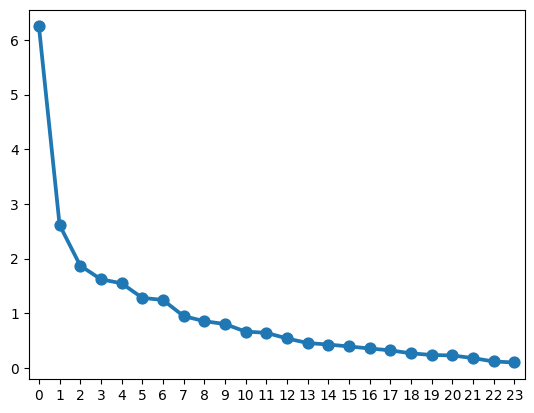

In [44]:
factor_model.get_eigenvalues()[0]
sns.pointplot(factor_model.get_eigenvalues()[0])

In [39]:
np.set_printoptions(suppress=True, precision=6)
factor_model.loadings_

array([[ 0.7034  , -0.124231, -0.017943],
       [ 0.301596,  0.215892,  0.129406],
       [-0.017923,  0.180182,  0.374144],
       [ 0.46209 , -0.191468,  0.153759],
       [ 0.846331, -0.126549, -0.071157],
       [ 0.28984 ,  0.140818,  0.140893],
       [ 0.57147 ,  0.026156, -0.144208],
       [ 0.474049,  0.109876, -0.130062],
       [ 0.730906, -0.03047 ,  0.095648],
       [ 0.692488, -0.066784, -0.015295],
       [ 0.163766, -0.146195,  0.323038],
       [ 0.27519 , -0.008614,  0.360319],
       [ 0.449665, -0.028606,  0.064012],
       [ 0.493232,  0.04444 , -0.049469],
       [ 0.84658 ,  0.023097, -0.230152],
       [ 0.436994,  0.083312,  0.009888],
       [ 0.317954,  0.148523,  0.165063],
       [ 0.042409,  0.110826,  0.386688],
       [ 0.139338,  0.314569, -0.038329],
       [-0.266421,  0.925496,  0.04516 ],
       [-0.128176,  0.966748, -0.019196],
       [ 0.077416,  0.762641,  0.003445],
       [-0.117488, -0.034534,  0.710917],
       [-0.409227,  0.000364,  1.0

<Axes: >

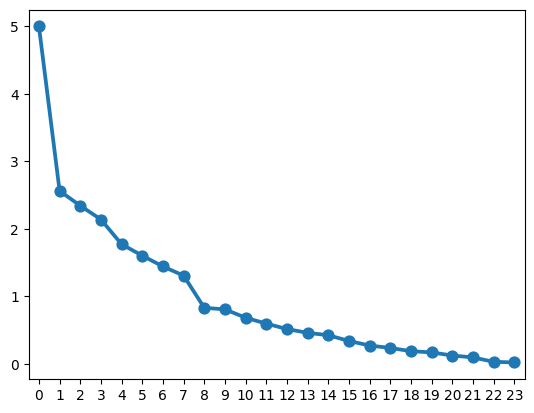

In [56]:
transfem_data = cleaned_data[cleaned_data['sex_gender?'] == 'Trans Female (Male-to-Female)']

transfem_model = FactorAnalyzer(rotation='promax', n_factors=2)
transfem_model.fit(transfem_data[GIQ_labels])

sns.pointplot(transfem_model.get_eigenvalues()[0])


In [57]:
transfem_model.loadings_

array([[ 0.472856, -0.164158],
       [ 0.487027,  0.142168],
       [ 0.436849, -0.395834],
       [ 0.304095,  0.187006],
       [ 0.487913,  0.095457],
       [ 0.435675,  0.385138],
       [-0.137099,  0.435661],
       [-0.193744,  0.658929],
       [ 0.27791 ,  0.783529],
       [ 0.792926, -0.376994],
       [ 0.525724, -0.186221],
       [ 0.16404 ,  0.087399],
       [ 0.172155,  0.168853],
       [ 0.216501,  0.071762],
       [ 0.66697 , -0.002563],
       [-0.053684,  0.415341],
       [ 0.444894,  0.0808  ],
       [ 0.294502, -0.026813],
       [ 0.42419 , -0.209477],
       [ 0.527253,  0.105925],
       [ 0.540117,  0.014861],
       [ 0.558779,  0.117827],
       [ 0.212203,  0.201834],
       [ 0.06477 ,  0.26726 ]])

In [67]:
for i in cleaned_data.iloc:
    print(i.kinsey_past)

2.0
nan
5.0
3.0
1.0
3.0
4.0
2.0
4.0
6.0
4.0
nan
6.0
2.0
3.0
4.0
5.0
3.0
1.0
1.0
1.0
1.0
5.0
3.0
4.0
3.0
4.0
3.0
5.0
3.0
3.0
1.0
1.0
5.0
3.0
6.0
nan
2.0
6.0
1.0
nan
4.0
2.0
2.0
2.0
2.0
3.0
3.0
nan
4.0
5.0
6.0
2.0
3.0
7.0
3.0
4.0
4.0
4.0
4.0
4.0
1.0


### Exploratory 1: What proportion of transitioned transsexuals have experienced a notable change in sexual orientation? 

Define 'notable change in sexual orientation' as a change of more than 1 point on the Kinsey Scale (e.g. a Kinsey 1 becoming a kinsey 3. Not a Kinsey 0 becoming a Kinsey 1)

In [102]:
cleaned_data.drop(columns=['transition_status'])
transitioned_dataset = cleaned_data[~cleaned_data['descriptions_present'].isin(["I'm still pre-transition"])]

In [100]:
n = 48
kinsey_change_count = 0
for subject in transitioned_dataset.iloc:
    if abs(subject.kinsey_present - subject.kinsey_past) > 1:
        kinsey_change_count += 1
kinsey_change_p = kinsey_change_count / n
print(kinsey_change_p)

0.2916666666666667


### Answer to Exploratory 1

29.1 percent, or roughly 30% of trans men and women who have transitioned, have experienced a change in sexual orientation

### Exploratory 2: How common are 'Euphoria Boners'

In [110]:
euphoria_boner_median = cleaned_data['CAQ_5'].median()
euphoria_boner_mean = cleaned_data['CAQ_5'].mean()

euphoria_boner_transfem_median = cleaned_data[cleaned_data['sex_gender?'] == 'Trans Female (Male-to-Female)']['CAQ_5'].median()
euphoria_boner_transfem_mean = cleaned_data[cleaned_data['sex_gender?'] == 'Trans Female (Male-to-Female)']['CAQ_5'].mean()

euphoria_boner_transmasc_median = cleaned_data[cleaned_data['sex_gender?'] == 'Trans Male (Female-to-Male)']['CAQ_5'].median()
euphoria_boner_transmasc_mean = cleaned_data[cleaned_data['sex_gender?'] == 'Trans Female (Female-to-Male)']['CAQ_5'].mean()

print(f'mean euphoria bonder tendency: {euphoria_boner_mean} (n={len(cleaned_data)})')
print(f'median euphoria bonder tendency: {euphoria_boner_median} (n={len(cleaned_data)})')

print(f'mean euphoria bonder tendency (transfem): {euphoria_boner_transfem_mean} (n={len(cleaned_data[cleaned_data['sex_gender?'] == 'Trans Female (Male-to-Female)'])})')
print(f'median euphoria bonder tendency (transfem): {euphoria_boner_transfem_median} (n={len(cleaned_data[cleaned_data['sex_gender?'] == 'Trans Female (Male-to-Female)'])})')

print(f'mean euphoria bonder tendency (transmasc): {euphoria_boner_transmasc_mean} (n={len(cleaned_data[cleaned_data['sex_gender?'] == 'Trans Male (Female-to-Male)'])})')
print(f'median euphoria bonder tendency (transmasc): {euphoria_boner_transmasc_median} (n={len(cleaned_data[cleaned_data['sex_gender?'] == 'Trans Male (Female-to-Male)'])})')

mean euphoria bonder tendency: 2.806451612903226 (n=62)
median euphoria bonder tendency: 3.0 (n=62)
mean euphoria bonder tendency (transfem): 3.1621621621621623 (n=37)
median euphoria bonder tendency (transfem): 4.0 (n=37)
mean euphoria bonder tendency (transmasc): nan (n=14)
median euphoria bonder tendency (transmasc): 2.0 (n=14)


Two ways of determining if a subject has experience 'euphoria boners' or something like it.

1. Apply threshold to the first question
2. check whether they left the two following questions blank (they were asked to leave them blank if they have not experienced such a thing)

In [112]:
transfem_sample = cleaned_data[cleaned_data['sex_gender?'] == 'Trans Female (Male-to-Female)']

method_1 = len(transfem_sample[transfem_sample['CAQ_5'] > 2]) / len(transfem_sample)
method_2 = len(transfem_sample[transfem_sample['CAQ_6'].isin([1, 2, 3, 4, 5])]) / len(transfem_sample)

method_1, method_2

(0.6756756756756757, 0.8108108108108109)

We could say somewhere between 68% and 81% of transfem subjects have at all experienced 'euphoria boners' or something similar

In [113]:
transmasc_sample = cleaned_data[cleaned_data['sex_gender?'] == 'Trans Male (Female-to-Male)']

method_1 = len(transmasc_sample[transmasc_sample['CAQ_5'] > 2]) / len(transmasc_sample)
method_2 = len(transmasc_sample[transmasc_sample['CAQ_6'].isin([1, 2, 3, 4, 5])]) / len(transmasc_sample)

method_1, method_2

(0.35714285714285715, 0.5)

We could say that somewhere between 36% and 50% of transmasc subjects have at all experienced 'euphoria boners' or something similar (probably something similar)

### Exploratory 3: What proportion of those who have experienced Euphoria Boners, say they were associated with arousal and/or the desire to masturbate.

In [115]:
boners = cleaned_data[cleaned_data['CAQ_6'].isin([1, 2, 3, 4, 5])]

sexy_boners = boners[boners['CAQ_6'] > 1] # lowest threshold (5-point likert 'Not at all' to 'Very much')
fappy_boners = boners[boners['CAQ_7'] > 1]

print(f'Sexy Boners: {(len(sexy_boners)/len(boners)*100)}% (n={len(boners)})')
print(f'Fappy Boners: {(len(fappy_boners)/len(boners)*100)}% (n={len(boners)})')

Sexy Boners: 73.80952380952381% (n=42)
Fappy Boners: 64.28571428571429% (n=42)


In [116]:
sexy_boners = boners[boners['CAQ_6'] > 2] # looser threshold (5-point likert 'Not at all' to 'Very much')
fappy_boners = boners[boners['CAQ_7'] > 2]

print(f'Sexy Boners: {(len(sexy_boners)/len(boners)*100)}% (n={len(boners)})')
print(f'Fappy Boners: {(len(fappy_boners)/len(boners)*100)}% (n={len(boners)})')

Sexy Boners: 57.14285714285714% (n=42)
Fappy Boners: 45.23809523809524% (n=42)


### Exploratory 2: For each sex/gender, what is the average change among those who experienced a notable change

In [ ]:
transitioned_n
transfem_kinsey_change_count